#                                         Salary Prediction

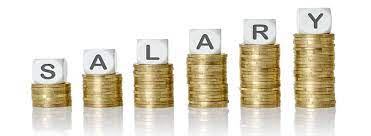

### Importing DataSet From the Kaggle To the Jupiter WorkSpace Using the Kaggle API

In [2]:
pip install kaggle


The following command must be run outside of the IPython shell:

    $ pip install kaggle

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
!pip install opendatasets

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import os

# Replace 'your_kaggle_username' and 'your_kaggle_api_key' with your actual Kaggle credentials
os.environ['KAGGLE_USERNAME'] = 'syamya'
os.environ['KAGGLE_KEY'] = '429600a134a728dc2176005d16b0553f'


In [6]:
import opendatasets as od
os.environ['KAGGLE_USERNAME'] = 'syamya'
os.environ['KAGGLE_KEY'] = '0a717338f3978640cbb800799b2ae017'
od.download("https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer")


Skipping, found downloaded files in ".\salaly-prediction-for-beginer" (use force=True to force download)


### To Get the list of files and directories in the current working directory

In [7]:
import os
os.listdir()

['.ipynb_checkpoints',
 '12-02-2024_ML_WiseProject_Salary_Predicition-Copy1.ipynb',
 '12-02-2024_ML_WiseProject_Salary_Predicition.ipynb',
 'kaggle datasets download -d rkiattisak',
 'kaggle.json',
 'Modified(EDA).ipynb',
 'Prediction',
 'salaly-prediction-for-beginer',
 'Salary.csv',
 'Untitled.ipynb']

### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Read Salary-data.csv File

In [9]:
import pandas as pd

# the file is located in a folder named "salary-data-csv" within the current directory
file_path = "./salaly-prediction-for-beginer/Salary Data.csv"

# Load the dataset into a DataFrame
sal_data = pd.read_csv(file_path)


### Exploratory Data Analysis (EDA)

In [10]:
# Viewing the first few rows of the data
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [11]:
# To Get the Last row of the Data
sal_data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


### Number of Rows and Columns

In [12]:
sal_data.shape  #it returns a tuple containing the number of rows and columns in the dataset.

(375, 6)

### List of Columns

In [13]:
sal_data.columns   # It returns an Index object containing the column labels.

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

### Rename Columns

In [14]:
sal_data.columns=['Age','Gender','Degree','Job_Title','Experience_years','Salary']

### Columns Datatypes

In [15]:
sal_data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

### data profiling

In [16]:
sal_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
Age                 373 non-null float64
Gender              373 non-null object
Degree              373 non-null object
Job_Title           373 non-null object
Experience_years    373 non-null float64
Salary              373 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### Duplicate Records in data

In [17]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [20]:
sal_data[sal_data.duplicated()].shape

(50, 6)

### Dropping Duplicates from the Data

In [21]:
sal_Data1=sal_data.drop_duplicates(keep='first')

In [22]:
sal_Data1.shape

(325, 6)

In [23]:
sal_Data1[sal_Data1.duplicated()].sum()

Age                 0.0
Gender              0.0
Degree              0.0
Job_Title           0.0
Experience_years    0.0
Salary              0.0
dtype: float64

### Missing / Null Values in each columns

In [24]:
sal_Data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

### Dropping Missing values from data

In [25]:
sal_Data1.dropna(how = 'any',inplace=True)

### Size of the data after dropping duplicate and null values

In [26]:
sal_Data1.shape

(324, 6)

### Data Exploration and Visualization

#### Statistics of Numerical Columns

In [27]:
sal_Data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


### Correlation Matrix Among Numerical Features

In [28]:
corr=sal_Data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


### Visualizing the Correlation Matrix

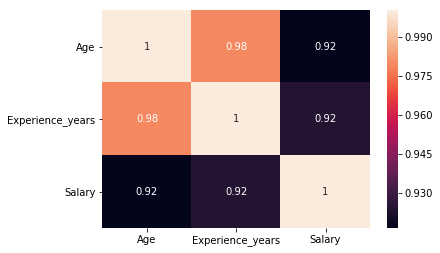

In [29]:
sns.heatmap(corr,annot=True)

In [30]:
sal_Data1['Degree'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Degree, dtype: int64

In [29]:
sal_Data1['Job_Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job_Title, Length: 174, dtype: int64

In [30]:
sal_Data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [31]:
sal_Data1['Gender'].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

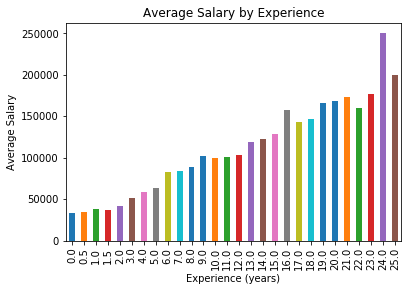

In [38]:
sal_Data1.groupby('Experience_years').mean()['Salary'].plot(kind='bar')
plt.xlabel('Experience (years)')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience')
plt.show()

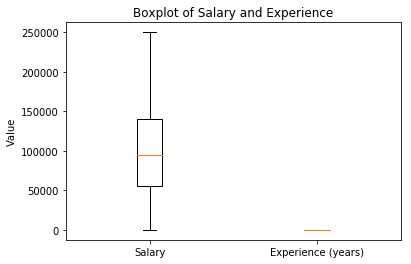

In [42]:
plt.boxplot([sal_Data1['Salary'], sal_Data1['Experience_years']], labels=['Salary', 'Experience (years)'])
plt.title('Boxplot of Salary and Experience')
plt.ylabel('Value')
plt.show()

### Feature Engineering

#### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [35]:
sal_Data1['Gender_Encode']=Label_Encoder.fit_transform(sal_Data1['Gender'])

In [36]:
sal_Data1['Degree_Encode']=Label_Encoder.fit_transform(sal_Data1['Degree'])

In [37]:
sal_Data1['Job_Title_Encode']=Label_Encoder.fit_transform(sal_Data1['Job_Title'])

### Data after Label Encoding

In [39]:
sal_Data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [44]:
sal_Data1['Age_scaled']=std_scaler.fit_transform(sal_Data1[['Age']])
sal_Data1['Experience_years_scaled']=std_scaler.fit_transform(sal_Data1[['Experience_years']])

### Data after Scaling

In [45]:
sal_Data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


### Dependent and independent features

In [46]:
X=sal_Data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y=sal_Data1['Salary']

In [47]:
X.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


### Splitting the data into Training and Testing

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
x_train.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
73,-1.307742,1,0,166,-1.213615
182,0.922302,0,2,155,0.744158
17,0.225413,1,2,116,0.292364
24,0.504169,1,1,37,0.442962
146,0.643547,0,2,115,0.894756


In [51]:
x_train.shape  #80% of data for Training The Model

(259, 5)

In [52]:
x_test.shape  #20% of data  for Testing The Model

(65, 5)

### Model Development 

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
Linear_regression_model=LinearRegression()

### Model Training

In [55]:
Linear_regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Predections

In [56]:
y_pred_lr=Linear_regression_model.predict(x_test)

In [57]:
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

#### Creating the DataFrame For the Actual Value and The Predicted Value

In [58]:
df=pd.DataFrame({'y_Actual':y_test,'y_Predicted':y_pred_lr})
df

,y_Actual,y_Predicted
132,100000.0,117415.913446
108,100000.0,125562.807428
137,50000.0,48965.153862
9,110000.0,128739.348880
181,105000.0,106828.499305
126,95000.0,99654.767488
221,45000.0,49101.278837
198,55000.0,57130.711081
279,180000.0,166333.690093
144,40000.0,43112.610601


#### Finding the Error between Actual and Predicted values

In [59]:
df['Error']=df['y_Actual'] - df['y_Predicted']
df.head()

,y_Actual,y_Predicted,Error
132,100000.0,117415.913446,-17415.913446
108,100000.0,125562.807428,-25562.807428
137,50000.0,48965.153862,1034.846138
9,110000.0,128739.348880,-18739.348880
181,105000.0,106828.499305,-1828.499305


In [60]:
df['abs_error']=abs(df['Error'])
df.head()

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305


In [ ]:
#Mean Absolute Error

In [61]:
Mean_absolute_Error=df['abs_error'].mean()
Mean_absolute_Error

10570.786401136182

### Model Evaluation

In [62]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

### Model Accuracy

In [63]:
r2_score(y_test,y_pred_lr)

0.8911231066517089

In [64]:
print(f'Accuracy of the model = {round(r2_score(y_test,y_pred_lr),4)*100}%')

Accuracy of the model = 89.11%


### Mean Absolute Error

In [65]:
MAE=round(mean_absolute_error(y_test,y_pred_lr),2)

In [66]:
#print(f"Mean Absolute Error = {round(mean_absolute_error(y_test,y_pred_lr),2)}")
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  10570.79


### Mean Squared Error

In [67]:
MSE=round(mean_squared_error(y_test,y_pred_lr),2)

In [69]:
print("Mean Squared Error = ",MSE)

Mean Squared Error =  205754135.72


### Root Mean Squared Error

In [70]:
print('Root Mean Sqaured Error (RMSE) = ',MSE**(0.5))

Root Mean Sqaured Error (RMSE) =  14344.132449193294


Simple Linear Regression Equation:

y=β0+β1*x

where :

y is the predicted value.

x is the input feature.

β0 is the intercept (also known as the bias).

β1 is the coefficient associated with the input feature 

### Coefficients

In [71]:
Linear_regression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

### Intercepts

In [72]:
Linear_regression_model.intercept_

86001.49320553214

Age =49

Gender = 'Female'= 0

Degree = 'PhD' = 2

Job_Title = 'Director' = 22

Experience_years = 15

Salary = ?


In [77]:
Age1=std_scaler.transform([[49]])
Age=5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815
# Find the Salary = ?

In [78]:
std_scaler.transform([[15]])

array([[0.74415815]])

In [79]:
Emp_salary=Linear_regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
#Emp_salary

In [80]:
print("Salary of the Employee Based On the Above Details = ",Emp_salary)

Salary of the Employee Based On the Above Details =  [249925.15061728]
